<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/study/sklearn/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **k-평균 알고리즘**
- 장점 : 알고리즘이 쉽고 간결, 일반적으로 많이 쓰는 군집화 알고리즘
- 단점 :
    - 거리 기반 알고리즘으로 속성 개수가 많으면 정확도가 떨어짐 >> PCA 차원 감소 필요
    - 몇 개의 군집을 선택해야 할지 가이드하기가 어려움

- 파라미터</br>
n_clusters : 군집화할 개수</br>
init : 초기 군집 중심점의 좌표를 설정할 방식, 일반적으로 k-means++ 방식으로 최초 설정함</br>
max_iter : 최대 반복 횟수</br>

In [4]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [9]:
# 각 데이터 포인트가 어떤 중심에 속해있는지
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [12]:
df['target'] = iris.target
df['cluster'] = kmeans.labels_

iris_result = df.groupby(['target', 'cluster'])['sepal_length'].count()
iris_result

# 0은 1번 그룹에 잘 매칭됨
# 1은 2개를 제외하고 0번 그룹에 잘 매칭됨
# 2는 14개를 제외하고 2번 그룹에 잘 매칭됨

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [13]:
# 2차원으로 시각화 (속성이 4개이므로 PCA를 통해 2차원으로 축소)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

df['pca_x'] = pca_transformed[:, 0]
df['pca_y'] = pca_transformed[:, 1]
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


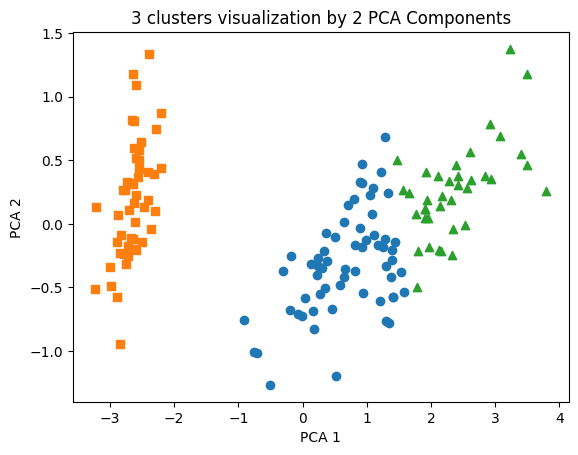

In [15]:
# 군집값이 0, 1, 2인 경우마다 별도 인덱스로 추출
marker0_ind = df[df['cluster']==0].index
marker1_ind = df[df['cluster']==1].index
marker2_ind = df[df['cluster']==2].index

plt.scatter(x=df.loc[marker0_ind, 'pca_x'], y=df.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=df.loc[marker1_ind, 'pca_x'], y=df.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=df.loc[marker2_ind, 'pca_x'], y=df.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters visualization by 2 PCA Components')
plt.show()

## **군집화 알고리즘 테스트를 위한 데이터 생성**

- make_blobs() : 개별 군집의 중심점과 표준 편차 제어 기능 탑재
- make_classification() : 노이즈를 포함한 데이터를 만드는 데 유용

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [67 67 66]


In [18]:
import pandas as pd

df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
df['target'] = y
df.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


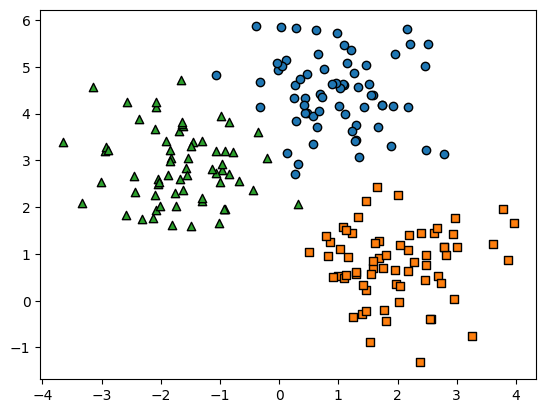

In [20]:
target_list = np.unique(y)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list:
    target_cluster = df[df['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


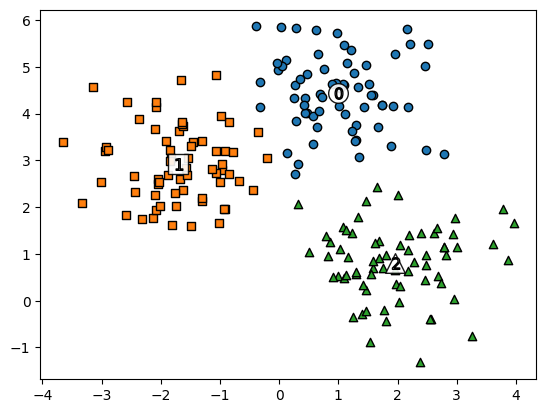

In [22]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
df['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = df[df['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k', marker=markers[label])

    # 중심 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='white', edgecolor='k', marker='$%d$' %label)

plt.show()

In [23]:
df.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64